In [406]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy as sc
import sympy as sm
from sklearn import linear_model as lm
import pandas as pd
from IPython.display import Latex
import warnings
warnings.filterwarnings("ignore")
def var(x):
    return np.sum((x-np.mean(x))**2)/(len(x)-1)
def std(x):
    return np.sqrt(np.sum((x-np.mean(x))**2)/(len(x)-1))
def cov(x,y):
    return 1/(len(x)-1)*np.sum((x-np.mean(x))*(y-np.mean(y)))

In [407]:
d=pd.read_csv("C:\\Users\\petro\\Desktop\\data.txt",names=['i','x','y'],delimiter=' ')
y=d['y']
x=d['x']

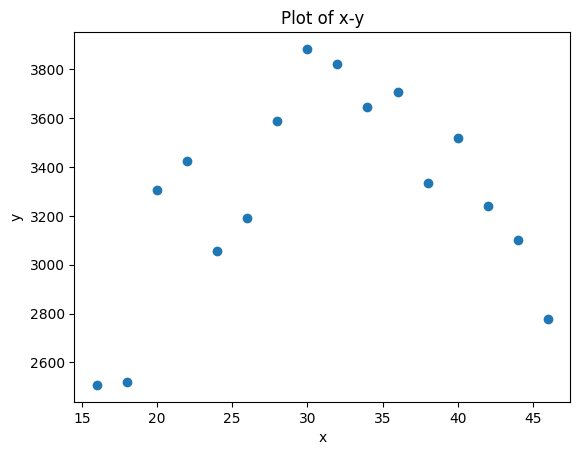

In [408]:
plt.scatter(x,y);
plt.title('Plot of x-y');
plt.xlabel('x');
plt.ylabel('y');

Due to higher adjusted R squared, we choose the approximation of conditional mean value as:


<IPython.core.display.Latex object>

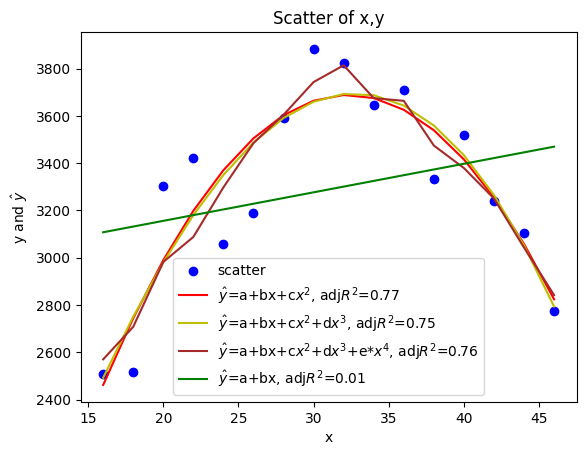

In [409]:
n=len(x)
plt.scatter(x,y,c='blue')

model1=lm.LinearRegression()
X=np.empty((len(x),2))
X[:,0]=x
X[:,1]=x**2
model1=model1.fit(X,y)
yaprox1=X@model1.coef_+model1.intercept_
adjRsquare1=1-(n-1)/(n-2-1)*np.sum((y-yaprox1)**2)/np.sum((y-np.mean(y))**2)
plt.plot(x,yaprox1,'r')

model2=lm.LinearRegression()
X=np.empty((n,3))
X[:,0]=x
X[:,1]=x**2
X[:,2]=x**3
model2=model2.fit(X,y)
yaprox2=X@model2.coef_+model2.intercept_
adjRsquare2=1-(n-1)/(n-3-1)*np.sum((y-yaprox2)**2)/np.sum((y-np.mean(y))**2)
plt.plot(x,yaprox2,'y')

model3=lm.LinearRegression()
X=np.empty((n,4))
X[:,0]=x
X[:,1]=x**2
X[:,2]=x**3
X[:,2]=x**4
model3=model3.fit(X,y)
yaprox3=X@model3.coef_+model3.intercept_
adjRsquare3=1-(n-1)/(n-4-1)*np.sum((y-yaprox3)**2)/np.sum((y-np.mean(y))**2)
plt.plot(x,yaprox3,'brown')


model4=lm.LinearRegression()
model4=model4.fit(np.reshape(x,(-1,1)),y)
yaprox4=np.reshape(x,(-1,1))@model4.coef_+model4.intercept_
adjRsquare4=1-(n-1)/(n-1-1)*np.sum((y-yaprox4)**2)/np.sum((y-np.mean(y))**2)
plt.plot(x,yaprox4,'g')


plt.legend(['scatter',r'$\hat y$=a+bx+c$x^2$, adj$R^2$=%.2f'%(adjRsquare1),r'$\hat y$=a+bx+c$x^2$+d$x^3$, adj$R^2$=%.2f'%(adjRsquare2),r'$\hat y$=a+bx+c$x^2$+d$x^3$+e*$x^4$, adj$R^2$=%.2f'%(adjRsquare3),r'$\hat y$=a+bx, adj$R^2$=%.2f'%(adjRsquare4)])
plt.title('Scatter of x,y')
plt.xlabel('x')
plt.ylabel(r'y and $\hat y$');
print(r'Due to higher adjusted R squared, we choose the approximation of conditional mean value as:')
Latex('$\widehat{{E(Y|X=x)}}=\hat y=%.3f+%.3fx+%.3fx^2$'%(model1.intercept_,model1.coef_[0],model1.coef_[1]))

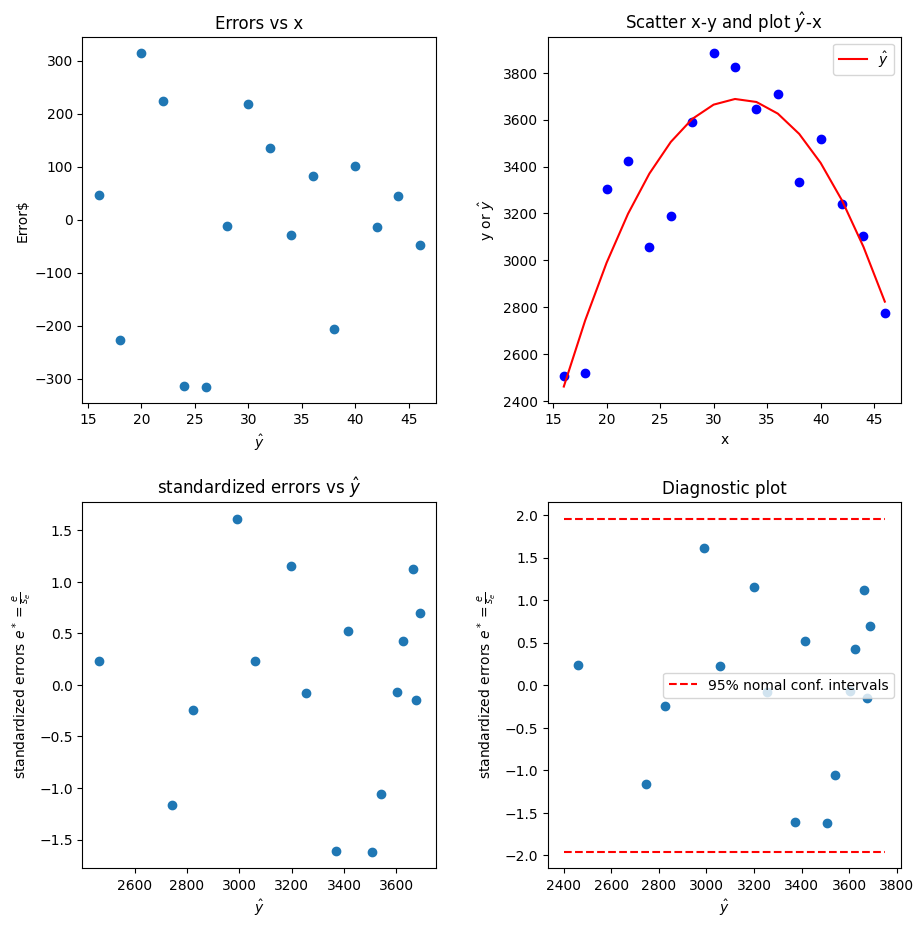

In [410]:
fig,ax=plt.subplots(2,2);
fig.set_figwidth(10);
fig.set_figheight(10);
fig.tight_layout(pad=5.0);

ax[0,1].scatter(x,y,c='blue');
ax[0,1].plot(x,yaprox1,'r',label=r'$\hat y$');
ax[0,1].set_title(r'Scatter x-y and plot $\hat y$-x');
ax[0,1].set_ylabel(r'y or $\hat y$');
ax[0,1].set_xlabel('x');
ax[0,1].legend(loc='upper right')

e=y-yaprox1;
se=np.sqrt(1/(n-2)*np.sum(e**2));
estar=e/se;
ax[1,0].scatter(yaprox1,estar);
ax[1,0].set_title(r'standardized errors vs $\hat y$');
ax[1,0].set_ylabel(r'standardized errors $e^*=\frac{e}{s_e}$');
ax[1,0].set_xlabel(r'$\hat y$');


ax[0,0].scatter(x,e);
ax[0,0].set_title(r'Errors vs x');
ax[0,0].set_ylabel(r'Error$');
ax[0,0].set_xlabel(r'$\hat y$');

ax[1,1].scatter(yaprox1,estar);
ax[1,1].set_title('Diagnostic plot');
axx=fig.axes;
xlim=axx[3].get_xlim();
crit=abs(sc.stats.norm.ppf(0.05/2));
ax[1,1].plot(xlim,[crit,crit],'r--');
ax[1,1].plot(xlim,[-crit,-crit],'r--',label='95% nomal conf. intervals');
ax[1,1].set_ylabel(r'standardized errors $e^*=\frac{e}{s_e}$');
ax[1,1].set_xlabel(r'$\hat y$');
ax[1,1].legend(loc='center right');


In [411]:
print("From the figures above, errors seems random as they should and non correlated either with x or y.\nThat mean the 2nd degree polynomial regression is well fitted.")

From the figures above, errors seems random as they should and non correlated either with x or y.
That mean the 2nd degree polynomial regression is well fitted.


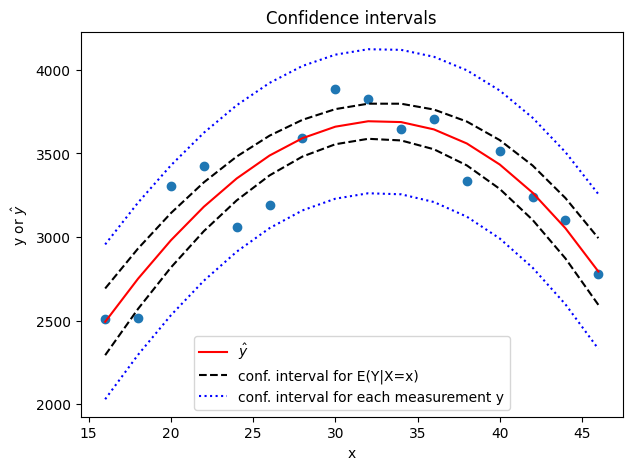

In [412]:
#Confidence intervals of conditional mean and of yi
sy=se*np.sqrt((1/n+(x-np.mean(x))**2/(n-1)/var(x)))
tcrit=abs(sc.stats.t.ppf(0.05/2,n-2))
intmeany1=-sy*tcrit+yaprox2
intmeany2=+sy*tcrit+yaprox2

sy2=np.sqrt(se**2+sy**2)
inty1=-sy2*tcrit+yaprox2
inty2=+sy2*tcrit+yaprox2

fig=plt.figure()
plt.title("Confidence intervals")
plt.xlabel('x')
plt.ylabel(r'y or $\hat y$')
fig.set_figwidth(7)
fig.set_figheight(5)
plt.scatter(x,y)
plt.plot(x,yaprox2,'r',label=r'$\hat y$')
plt.plot(x,intmeany1,'k--',label=r'conf. interval for E(Y|X=x)')
plt.plot(x,intmeany2,'k--')
plt.plot(x,inty1,'b:')
plt.plot(x,inty2,'b:',label=r'conf. interval for each measurement y')
plt.legend();
